In [38]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt

import xarray as xr
import sys
sys.path.append('../dataset')
from data.common import  CreateListOfLinkfilesInSpan
sys.path.append('../visualize')
import plotTestSetup as setup
from plotTest import plotDistribution

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
f = open('../path_to_data.txt', "r")
path_to_dataset = f.readline().rstrip("\n")
f.close() 

In [30]:
y_train = np.load(os.path.join(path_to_dataset, 'data/dataset-singles/train/y.npy'))
y_val = np.load(os.path.join(path_to_dataset, 'data/dataset-singles/validation/y.npy'))
y_test = np.load(os.path.join(path_to_dataset, 'data/dataset-singles/test/y.npy'))

In [31]:
def view_label(y):
    tot = len(y)
    print(tot)
    rain = len(y[y > 0.0])
    print('rain fraction', rain/tot)
    fig, ax = plt.subplots(figsize = (8,5))
    ax.hist(y[y > 0.0], bins = 500)
    plt.show()
    #print('smallest non-zero value', min(y[y > 0.0]))
    sorted_pos = np.sort(y[y>0.0])
    print('smallest non-zero values', sorted_pos[sorted_pos<0.1])
    print('amount',len(sorted_pos[sorted_pos<0.1]))
    print('small rain fraction of rain', len(sorted_pos[sorted_pos<0.1])/rain)
    fig, ax = plt.subplots(figsize = (8,5))
    ax.hist(np.log(y[y > 0.0]), bins = 500)
    plt.show()

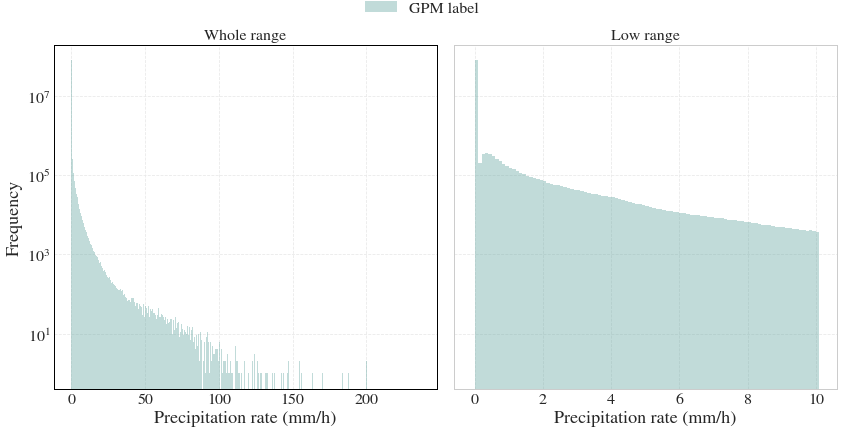

In [32]:
start = -0.1
end = 236.0
binsize = 0.1
num_of_bins = int(np.round((end-start)/binsize)+1)
bins = np.linspace(start,end,num_of_bins)


data_dict = {}
quantity = 'precipitation rate (mm/h)'
data_list = ['gpm']
for var in data_list:
    data_dict[var] = y_train

plotDistribution(data_dict, bins, 'gpm', 
                 [],
                quantity=quantity,
                #filename='../plots/thesis/gpm_dist_train.pdf'
                )

In [33]:
#load dataset
combined_all = xr.open_dataset(os.path.join(path_to_dataset,'combined.nc'))
mask = np.zeros((combined_all.gauge_precip.values.shape[0], combined_all.gauge_precip.values.shape[1]))
mask[np.isnan(combined_all.gauge_precip.values)] = 1
mask[np.isnan(combined_all.HE_precip.values)] = 1
mask[np.isnan(combined_all.xception_posterior_mean.values)] = 1

# Make sure that comparison is done only where values are present in all datasets.
combined = combined_all.copy()
combined = combined.where(mask==0)

In [34]:
gauges = combined.gauge_precip.values[mask==0].flatten()

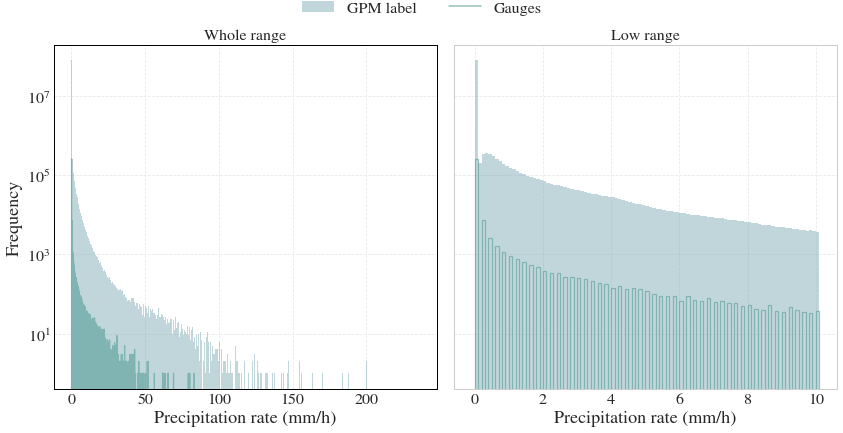

In [40]:
start = -0.1
end = 236.0
binsize = 0.1
num_of_bins = int(np.round((end-start)/binsize)+1)
bins = np.linspace(start,end,num_of_bins)


data_dict = {}
quantity = 'precipitation rate (mm/h)'
data_dict['gpm_var'] = y_train
data_dict['gauge_precip'] = gauges

plotDistribution(data_dict, bins, 'gpm_var', 
                 ['gauge_precip'],
                quantity=quantity,
                #filename='../plots/thesis/gpmgauge_dist_train.pdf'
                )